<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass3/bdm/Ayam%20Rendang/Big_Data_EDA_Ayam_Rendang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Delay and Cancellation Data, 2009 - 2018 EDA**

**Project Introduction:**

This project based on the dataset contains information on Airline Delay and Cancelation Data. The dataset is retrieved from Kaggle database. The project objective is to carry out EDA on this dataset to analyze the patterns and trends especially of Airline Delay and Cancelation and visualize the findings using appropriate visualisation methods as part of descriptive data analysis.

The dataset that was been downloaded from Kaggle has inputs from 2009 to 2018. For this analysation the team would carry out EDA on 2018 dataset.


---



**Team Member:**

THANEATHARRAN A/L SANTHARASEKARAN (MSC232006)

RANJEET A/L THIAGARAJAN (MCS231015)

NURUL WAHIEDA BINTI MUHAMMAD FARID SELLEKUMAR (MCS231022)

LINGGESH A/L TAMILMANI (MCS232005)


## **Importing Dataset from Kaggle**

In [ ]:
!pip install kaggle

In [3]:
from google.colab import files

# Upload the Kaggle API key
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
# create a kaggle folder
!mkdir -p ~/.kaggle

In [5]:
# copy kaggle.json to the folder created
!cp kaggle.json ~/.kaggle/



In [6]:
# Persimission for json to act
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018

airline-delay-and-cancellation-data-2009-2018.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip *.zip && rm *.zip

Archive:  airline-delay-and-cancellation-data-2009-2018.zip
  inflating: 2009.csv                
  inflating: 2010.csv                
  inflating: 2011.csv                
  inflating: 2012.csv                
  inflating: 2013.csv                
  inflating: 2014.csv                
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                


In [ ]:
%cd Flight_delay_data/

/content/drive/MyDrive/kaggle/Flight_delay_data


## **Import necessary libraries**

In [10]:
import pandas as pd
import numpy as np


## **Dataset Reading**

In [11]:
df = pd.read_csv("/content/2018.csv")

## **Helper Functions**

In [12]:
class DfOverview:
    """
        Give an overview for a given data frame,
        like null persentage for each columns,
        unique value percentage for each columns and more
    """

    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def missing_value(self) -> None:
        nullSum = self.df.isna().sum()
        return [col for col in nullSum]

    def percentage(self, list):
        return [str(round(((value / self.df.shape[0]) * 100), 2)) + '%' for value in list]

    def getOverview(self) -> None:

        _columns = [column for column in self.df]
        _count = self.df.count().values
        _unique = [self.df[column].value_counts().shape[0] for column in self.df]
        _missing_values = self.missing_value()

        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype']
        data = zip(
            _columns,
            _count,
            _missing_values,
            self.percentage(_missing_values),
            _unique,
            self.percentage(_unique),
            self.df.dtypes
        )
        new_df = pd.DataFrame(data=data, columns=columns)
        return new_df

In [13]:
def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

In [14]:
def percent_missing_values(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [15]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending and remove columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,0] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [16]:
def convert_to_string(df, columns):
    for col in columns:
        df[col] = df[col].astype("string")

In [17]:
def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace=True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("No duplicate rows were found.")
    else:
        print(f"{count} duplicate rows were found and removed.")

## **General Statistics**

In [18]:
# number of elements(cells) in the df
df.size

201976488

In [19]:
# rows and columns in the df
df.shape

(7213446, 28)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [21]:
df_overview = DfOverview(df)
df_overview.getOverview()

,Column,count,missing_value_count,Missing_value_percentage,unique_value_count,unique_value_percentage,dtype
0,FL_DATE,7213446,0,0.0%,365,0.01%,object
1,OP_CARRIER,7213446,0,0.0%,18,0.0%,object
2,OP_CARRIER_FL_NUM,7213446,0,0.0%,7113,0.1%,int64
3,ORIGIN,7213446,0,0.0%,358,0.0%,object
4,DEST,7213446,0,0.0%,358,0.0%,object
5,CRS_DEP_TIME,7213446,0,0.0%,1369,0.02%,int64
6,DEP_TIME,7101129,112317,1.56%,1440,0.02%,float64
7,DEP_DELAY,7096212,117234,1.63%,1488,0.02%,float64
8,TAXI_OUT,7097616,115830,1.61%,180,0.0%,float64
9,WHEELS_OFF,7097617,115829,1.61%,1440,0.02%,float64


## **Dropping unnecessary Columns**

The columns CARRIER_DELAY	, WEATHER_DELAY , NAS_DELAY , SECURITY_DELAY , and LATE_AIRCRAFT_DELAY because these columns which denote the reasons for delay are not our interest of this analysis and most of the times the columns are empties. Thus, we dropped them.

In [22]:
df.drop(columns = ["CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"],inplace = True, axis = 1)

In [23]:
df.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'Unnamed: 27'],
      dtype='object')

The column Unnamed: 27 also contained 100 percent NaN. Thus, we also remove it.

In [24]:
df.drop(columns = "Unnamed: 27",inplace = True, axis = 1)

## **Missing Values**

In [25]:
percent_missing_values(df)

The dataset contains 5.24 % missing values.


In [26]:
missing_values_table(df)

Your selected dataframe has 22 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values,Dtype
CANCELLATION_CODE,7096862,98.38,object
ARR_DELAY,137040,1.90,float64
ACTUAL_ELAPSED_TIME,134442,1.86,float64
AIR_TIME,134442,1.86,float64
WHEELS_ON,119246,1.65,float64
TAXI_IN,119246,1.65,float64
ARR_TIME,119245,1.65,float64
DEP_DELAY,117234,1.63,float64
TAXI_OUT,115830,1.61,float64
WHEELS_OFF,115829,1.61,float64


## **Duplicates**

In [27]:
# search for duplicate rows and drop them
drop_duplicates(df)

No duplicate rows were found.


## **Univariate Analysis**

In [28]:
df.head(3)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0


The cloumn FL_DATE is split into two different columns named FLIGHT_Month and FLIGHT_Year for ease of further analysis.

In [29]:
df_split = df["FL_DATE"].str.split("-",expand = True)
df_split
df.insert(loc=1,column = "FLIGHT_Year", value = df_split[0])
df.insert(loc=2,column = "FLIGHT_Month", value = df_split[1])
df.drop(["FL_DATE"], axis = 1, inplace = True)

In [30]:
df.head(3)

,FLIGHT_Year,FLIGHT_Month,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018,01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,...,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0
1,2018,01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,...,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0
2,2018,01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,...,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0


In [31]:
# Renaming airline codes to company names
# Source: https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States

df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

In [32]:
# Quality check
df.OP_CARRIER.unique()

array(['United Airlines', 'Alaska Airlines', 'Endeavor Air',
       'JetBlue Airways', 'ExpressJet', 'Frontier Airlines',
       'Allegiant Air', 'Hawaiian Airlines', 'Envoy Air',
       'Spirit Airlines', 'PSA Airlines', 'SkyWest Airlines',
       'Virgin America', 'Southwest Airlines', 'Mesa Airline',
       'Republic Airways', 'American Airlines', 'Delta Airlines'],
      dtype=object)

## **Flight That Has Been Cancelled**

In [33]:
# Total number of canceled flights
df.CANCELLED.sum()

116584.0

In [34]:
# Let's explore column CANCELLED
df.CANCELLED.unique()

array([0., 1.])

In [35]:
# From above we see it's binary: 0 or 1, let's see how it looks like
canceled = df[(df['CANCELLED'] > 0)]

In [37]:
canceled.head(5)

,FLIGHT_Year,FLIGHT_Month,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
178,2018,01,United Airlines,2034,IAH,MFE,1440,NaN,NaN,NaN,...,1601,NaN,NaN,1.0,B,0.0,81.0,NaN,NaN,316.0
875,2018,01,United Airlines,864,LAS,SFO,1744,NaN,NaN,NaN,...,1926,NaN,NaN,1.0,A,0.0,102.0,NaN,NaN,414.0
1244,2018,01,United Airlines,488,MFE,IAH,1726,NaN,NaN,NaN,...,1844,NaN,NaN,1.0,B,0.0,78.0,NaN,NaN,316.0
1584,2018,01,Alaska Airlines,5,DCA,LAX,910,NaN,NaN,NaN,...,1230,NaN,NaN,1.0,A,0.0,380.0,NaN,NaN,2311.0
1639,2018,01,Alaska Airlines,64,WRG,KTN,1623,NaN,NaN,NaN,...,1655,NaN,NaN,1.0,B,0.0,32.0,NaN,NaN,82.0


* Canceled flights are not delayed flights
* If canceled, the flight didn't happen


## **Arrival & Departure Delay**

In [39]:
# Arrival delay data (in minutes)
df.ARR_DELAY.head()

0   -23.0
1   -24.0
2   -13.0
3    -2.0
4    14.0
Name: ARR_DELAY, dtype: float64

In [38]:
# Departure delay data (in minutes)
df.DEP_DELAY.head()

0    -5.0
1    -8.0
2    -5.0
3     6.0
4    20.0
Name: DEP_DELAY, dtype: float64



*   If a number is positive = flight delayed
*   Exploring only delayed flights, non-delayed should be dropped




In [40]:
# To do this analysis right, let's filter all negative numbers in ARR_DELAY column
# Number of delayed flights
df[df.ARR_DELAY > 0 ].count()

FLIGHT_Year            2516050
FLIGHT_Month           2516050
OP_CARRIER             2516050
OP_CARRIER_FL_NUM      2516050
ORIGIN                 2516050
DEST                   2516050
CRS_DEP_TIME           2516050
DEP_TIME               2516050
DEP_DELAY              2514853
TAXI_OUT               2516050
WHEELS_OFF             2516050
WHEELS_ON              2516050
TAXI_IN                2516050
CRS_ARR_TIME           2516050
ARR_TIME               2516050
ARR_DELAY              2516050
CANCELLED              2516050
CANCELLATION_CODE            0
DIVERTED               2516050
CRS_ELAPSED_TIME       2516050
ACTUAL_ELAPSED_TIME    2516049
AIR_TIME               2516049
DISTANCE               2516050
dtype: int64

In [41]:
# Filter out non-delayed flights < 0 DEP_DELAY
df = df[(df['ARR_DELAY'] > 0)]

In [60]:
df.head()

,FLIGHT_Year,FLIGHT_Month,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
4,2018,01,United Airlines,2424,ORD,ALB,630,10.833333,0.000093,13.0,...,922,0.260000,0.003889,0.0,NaN,0.0,112.0,106.0,83.0,723.0
11,2018,01,United Airlines,2416,ORD,CLE,2059,38.333333,0.000560,24.0,...,2311,0.033333,0.035833,0.0,NaN,0.0,72.0,80.0,48.0,316.0
14,2018,01,United Airlines,2413,ORD,BTV,2114,37.166667,0.000352,14.0,...,15,0.035556,0.020278,0.0,NaN,0.0,121.0,118.0,99.0,763.0
15,2018,01,United Airlines,2412,MCO,LAX,653,12.450000,0.000250,14.0,...,930,0.284722,0.015278,0.0,NaN,0.0,337.0,338.0,302.0,2218.0
16,2018,01,United Airlines,2411,EWR,SMF,1810,32.033333,0.000333,16.0,...,2136,0.611389,0.006944,0.0,NaN,0.0,386.0,339.0,319.0,2500.0


In [43]:
# Down from 7.2 to 2.5 million (relevant) records
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516050 entries, 4 to 7213444
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FLIGHT_Year          object 
 1   FLIGHT_Month         object 
 2   OP_CARRIER           object 
 3   OP_CARRIER_FL_NUM    int64  
 4   ORIGIN               object 
 5   DEST                 object 
 6   CRS_DEP_TIME         int64  
 7   DEP_TIME             float64
 8   DEP_DELAY            float64
 9   TAXI_OUT             float64
 10  WHEELS_OFF           float64
 11  WHEELS_ON            float64
 12  TAXI_IN              float64
 13  CRS_ARR_TIME         int64  
 14  ARR_TIME             float64
 15  ARR_DELAY            float64
 16  CANCELLED            float64
 17  CANCELLATION_CODE    object 
 18  DIVERTED             float64
 19  CRS_ELAPSED_TIME     float64
 20  ACTUAL_ELAPSED_TIME  float64
 21  AIR_TIME             float64
 22  DISTANCE             float64
dtypes: float64(14), int64(3), object

## **Data Visualisation**

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

### **Delay by airlines**

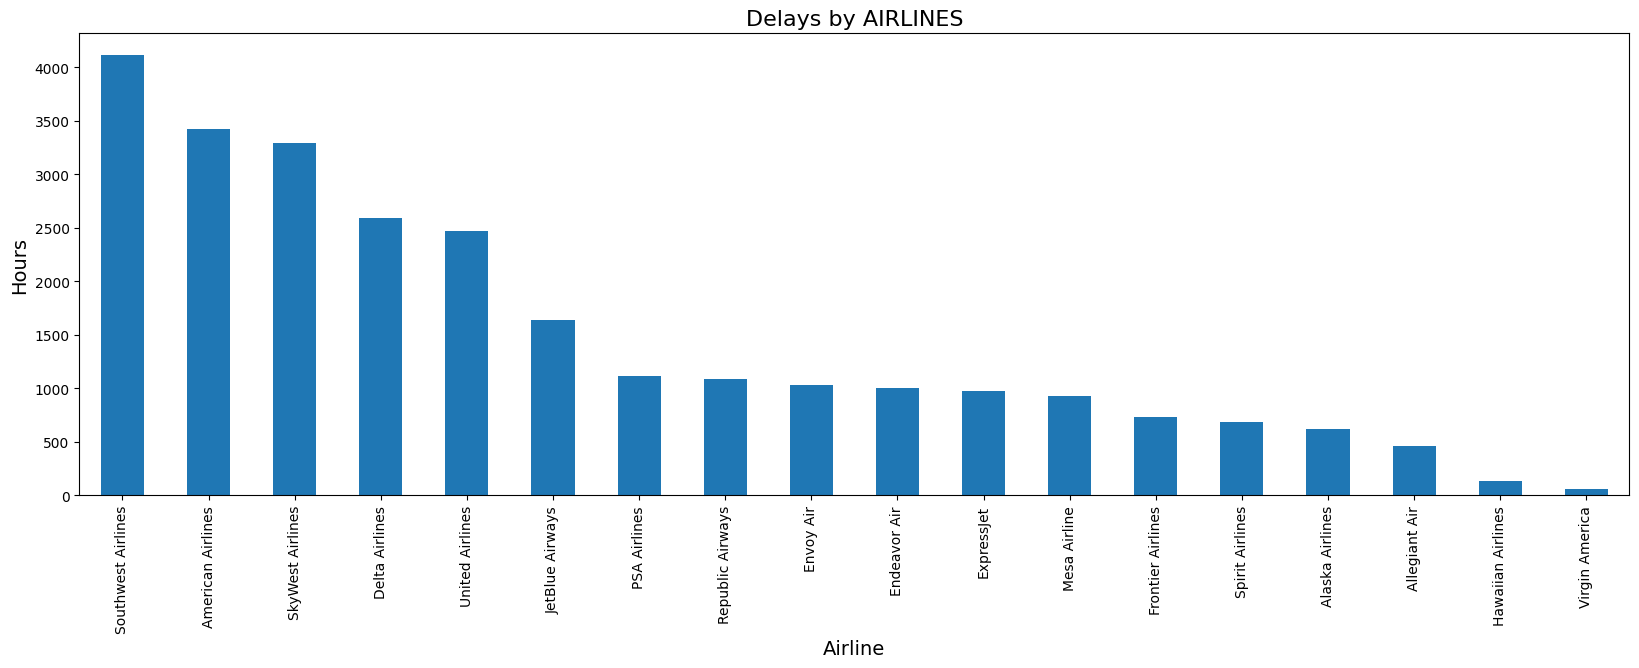

In [61]:
# Delay by airlines
plt.figure(figsize=(20, 6))
df.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

### **Delay by City**

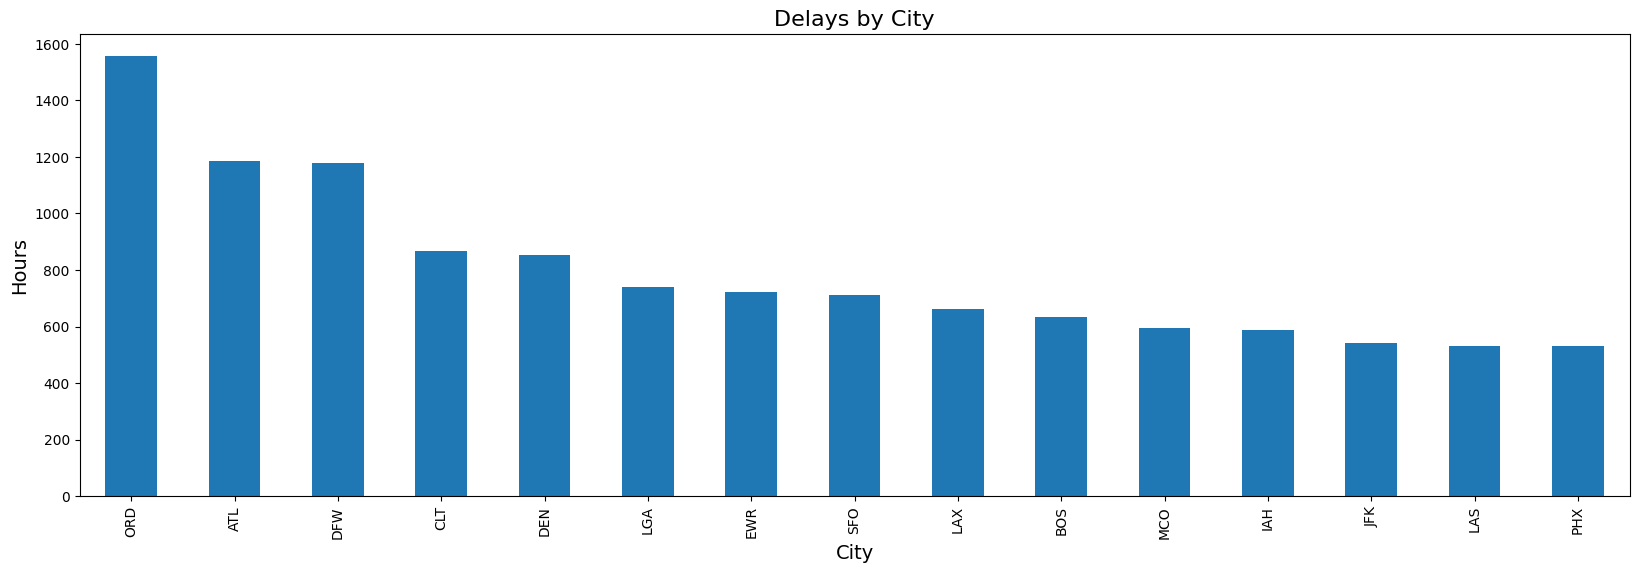

In [62]:
# Delay by City
city_by_delay = df.groupby('ORIGIN').ARR_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:15].plot.bar()
plt.title('Delays by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

### **Arrival delay by month of the year**

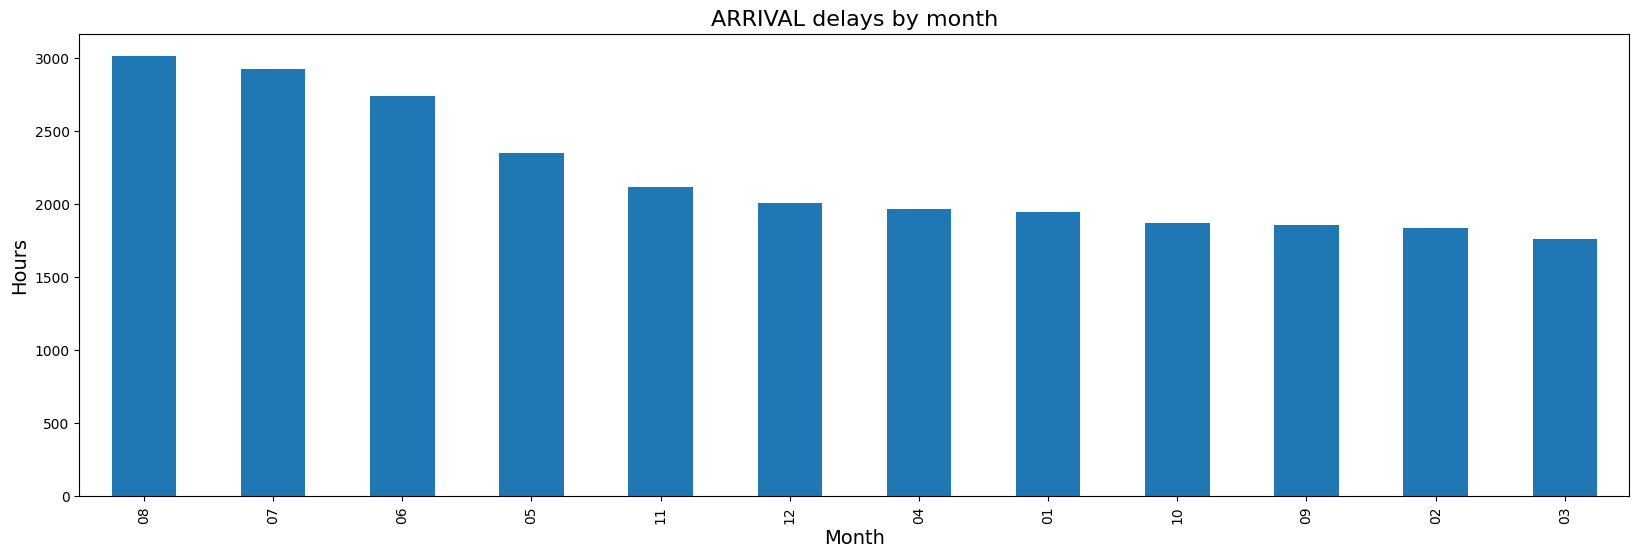

In [63]:
# Arrival delay by month of the year
city_by_delay = df.groupby('FLIGHT_Month').ARR_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:15].plot.bar()
plt.title('ARRIVAL delays by month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

### **Departure delay by month of the year**

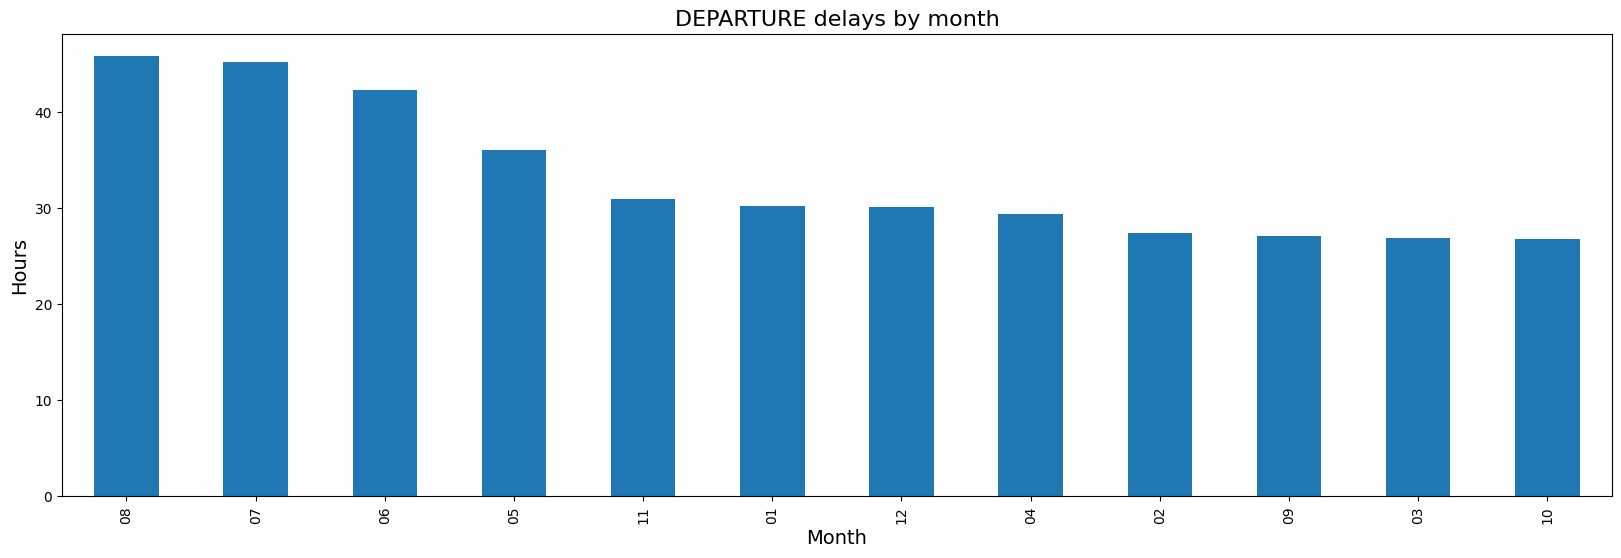

In [64]:
# Departure delay by month of the year
city_by_delay = df.groupby('FLIGHT_Month').DEP_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:15].plot.bar()
plt.title('DEPARTURE delays by month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()